Hi, I’m Peter, a neuroscientist currently working in healthcare. In this notebook, I’m going to explore a data set that contains information about patients with Parkinson's Disease. It contains information about both the severity of their disease as well as 16 voice-recording metrics. From the paper this data set is published in, it seems the authors were able to predict severity of the disease from a patient's voice alone. Can I find the same thing? Let’s find out! I don't have the most experience working with data sets like this and I will try to document my caveats along the way.

This data set comes from Athanasios Tasanas and Max Little of the University of Oxford. 

Citation:  A. Tsanas, M. A. Little, P. E. McSharry and L. O. Ramig, "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests," in IEEE Transactions on Biomedical Engineering, vol. 57, no. 4, pp. 884-893, April 2010.
doi: 10.1109/TBME.2009.2036000

First let's import some libraries we will need.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for plotting things nicely
import seaborn as sns
sns.set()
from IPython.core.pylabtools import figsize

#The below for some models of the data
from sklearn import linear_model as lm #linear regression
from sklearn import ensemble # random forest regression
from sklearn import decomposition # pca

Now let's import our data set. It's a csv, and we have the organization from UC Irvine's machine learning repository: https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring
        
In short, 42 people with early-stage Parkinson's disease were recorded in their homes over six months. Each recording captured 16 different voice measures, and each time these measures were taken the severity of their Parkinson's disease was recorded using the Unified Parkinson's Disease Rating Scale (UPDRS).

In [108]:
df = pd.read_csv('datasets/Parkinsons_UPDRS_from_voice/parkinsons_updrs.data', sep=',',header=0)
print("The dataset's shape (#rows, #columns): ",df.shape,'\n')
print("The dataset's columns: ",df.columns,'\n')
print("Summary of dataset:")
df.T



The dataset's shape (#rows, #columns):  (5875, 22) 

The dataset's columns:  Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object') 

Summary of dataset:


,0,1,2,3,4,5,6,7,8,9,...,5865,5866,5867,5868,5869,5870,5871,5872,5873,5874
subject#,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
age,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
sex,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
test_time,5.643100,12.666000,19.681000,25.647000,33.642000,40.652000,47.649000,54.640000,61.669000,68.688000,...,106.760000,115.650000,121.630000,128.670000,136.800000,142.790000,149.840000,156.820000,163.730000,170.730000
motor_UPDRS,28.199000,28.447000,28.695000,28.905000,29.187000,29.435000,29.682000,29.928000,30.177000,30.424000,...,25.029000,24.401000,23.979000,23.482000,22.908000,22.485000,21.988000,21.495000,21.007000,20.513000
total_UPDRS,34.398000,34.894000,35.389000,35.810000,36.375000,36.870000,37.363000,37.857000,38.353000,38.849000,...,36.029000,35.401000,34.979000,34.482000,33.908000,33.485000,32.988000,32.495000,32.007000,31.513000
Jitter(%),0.006620,0.003000,0.004810,0.005280,0.003350,0.003530,0.004220,0.004760,0.004320,0.004960,...,0.003290,0.004480,0.002500,0.002490,0.002740,0.004060,0.002970,0.003490,0.002810,0.002820
Jitter(Abs),0.000034,0.000017,0.000025,0.000027,0.000020,0.000023,0.000024,0.000025,0.000029,0.000027,...,0.000024,0.000036,0.000019,0.000021,0.000021,0.000031,0.000025,0.000025,0.000020,0.000021
Jitter:RAP,0.004010,0.001320,0.002050,0.001910,0.000930,0.001190,0.002120,0.002260,0.001560,0.002580,...,0.001440,0.002080,0.001160,0.000660,0.001180,0.001670,0.001190,0.001520,0.001280,0.001350
Jitter:PPQ5,0.003170,0.001500,0.002080,0.002640,0.001300,0.001590,0.002210,0.002590,0.002070,0.002530,...,0.001320,0.002260,0.001360,0.001040,0.001380,0.001680,0.001470,0.001870,0.001510,0.001660



Above you can see a summary of the dataset printed out. Just at a glance it looks like columns (transposed to rows above for easy viewing) of the dataset are organized in the right place, but let's take a look at a few aspects of the data to feel more comfortable that it is both complete and what it says it is. First, despite the assurances of UCI, I would like to make sure there aren't any null values in this dataset.


In [109]:
numnulls = df.isnull().sum().sum()
print(numnulls)

0


Great! No null variables. I'm just going to make a data set with null variables to make sure that measurement works as intended.


In [110]:
ndf = pd.DataFrame(columns=['1','2','3'])
for i in range(5):
    ndf.loc[i] = None; 
print(ndf)
numnulls2 = ndf.isnull().sum().sum()
print("Number of nulls in dataframe:",numnulls2)

     1    2    3
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4  NaN  NaN  NaN
Number of nulls in dataframe: 15




Now let's learn some more things about the data set. If the columns are populated correctly, I would expect the "subject#" column to be populated by a consecutive, ascending set of integers. According to the documentation, the subject sex is 0 for male and 1 for female, so I expect that sex is restricted to those two values. I would also expect the ages of the patients to be on the older side, as Parkinson's disease doesn't tend to affect younger populations and is actually considered "young onset" if it's diagnosed before the age of 40.

In [111]:
print("Unique subject numbers:",df['subject#'].unique())
print("Unique values for the sex variable:",df['sex'].unique())
print("Unique ages of patients:",df['age'].unique())



Unique subject numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Unique values for the sex variable: [0 1]
Unique ages of patients: [72 58 57 74 75 63 73 68 55 62 65 66 67 59 60 76 49 78 36 71 56 85 61]


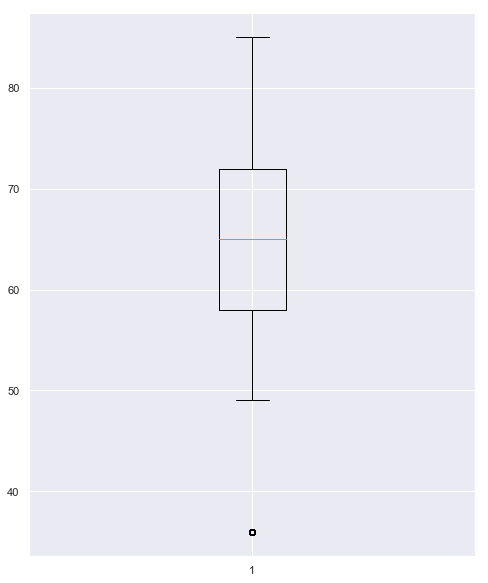

In [112]:
plt.boxplot(df.age)
plt.show()


All of these outputs seem in line with my expectations. I wonder how the patients' UPDRS scores vary over time. It's my understanding that Parkinson's disease only gets worse, not better, and if the UPDRS scores are accurate they should show this. I'll look at both motor_UPDRS (a subset of only their motor symptoms) and total_UPDRS (a score for total severity of the disease).

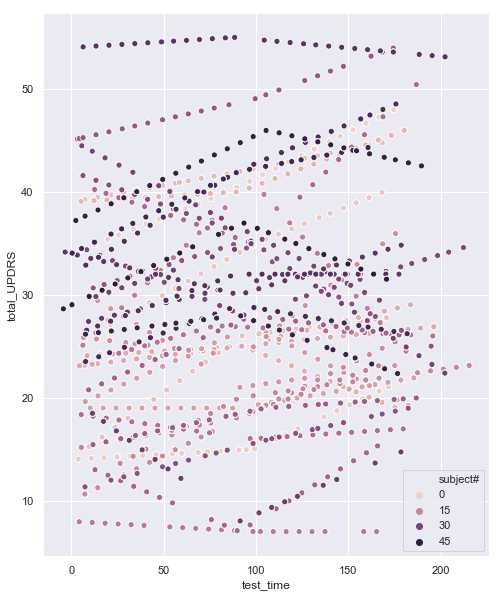

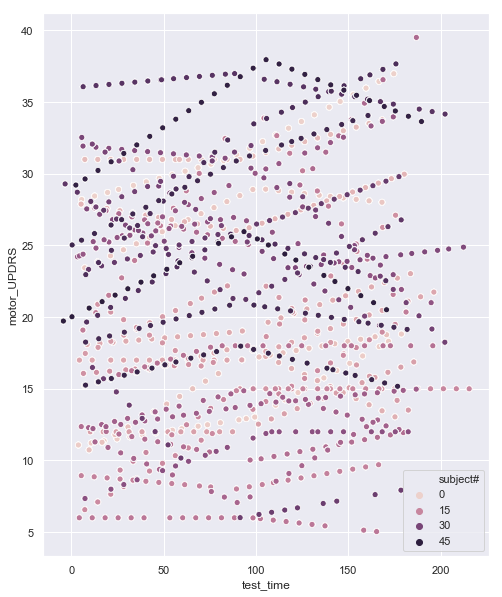

In [113]:
figsize(8, 10)
sns.scatterplot(x='test_time', y='total_UPDRS', hue='subject#', data=df)
plt.show()
sns.scatterplot(x='test_time', y='motor_UPDRS', hue='subject#', data=df)

It's a little hard to see with so many subjects plotted, but I'm not seeing the nice correlation of time vs. total_UPDRS that I expect, which is interesting. Let's see what it looks like if we plot each person independently.

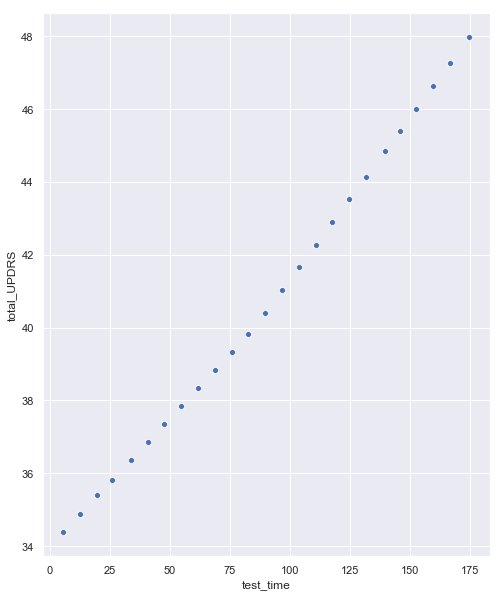

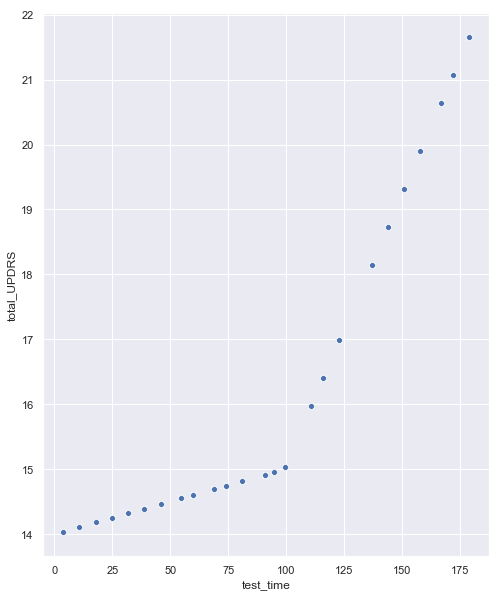

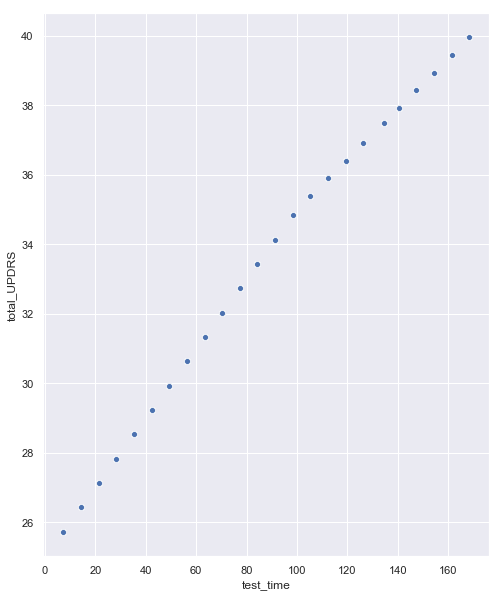

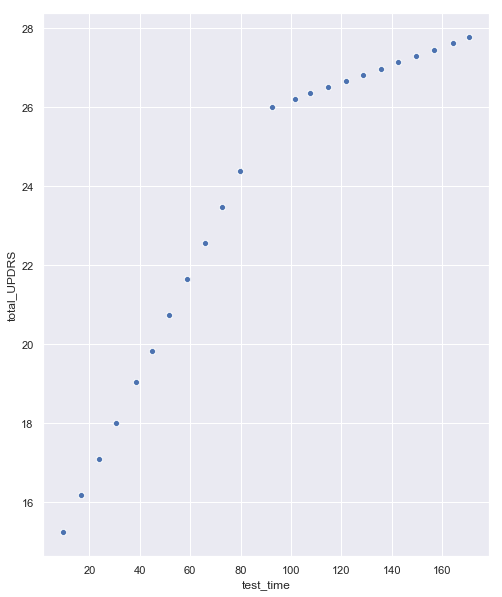

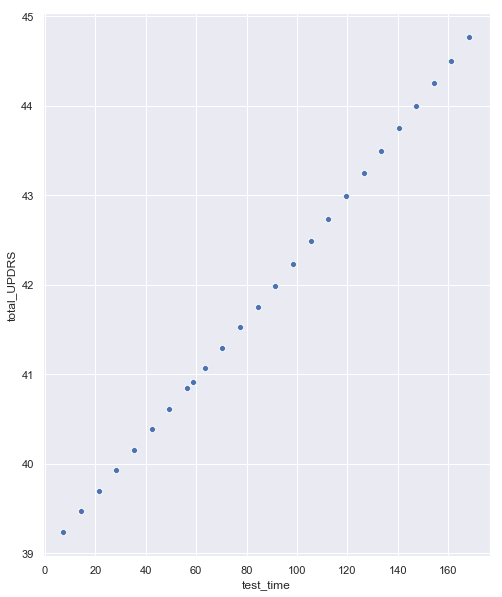

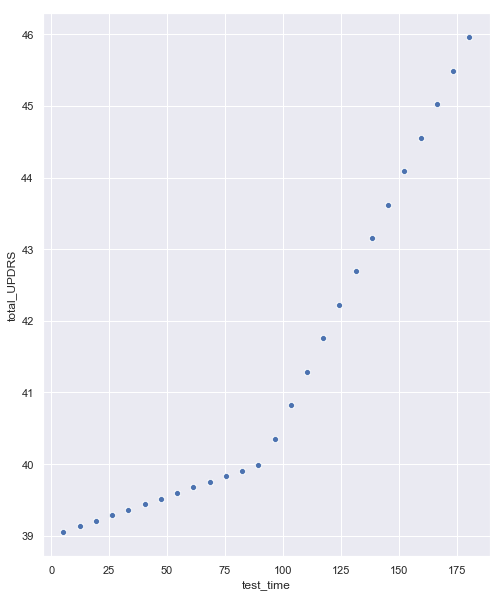

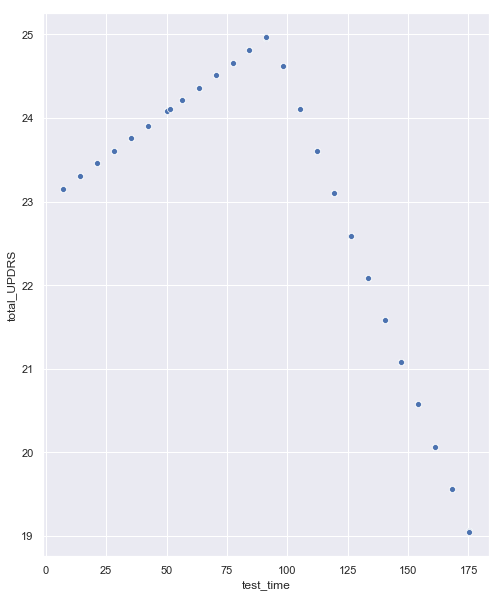

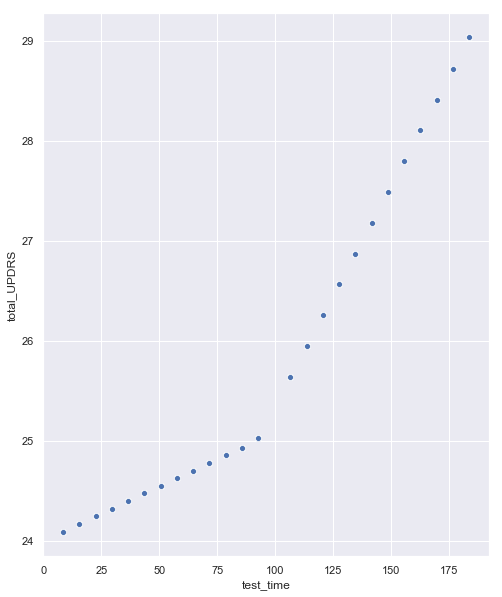

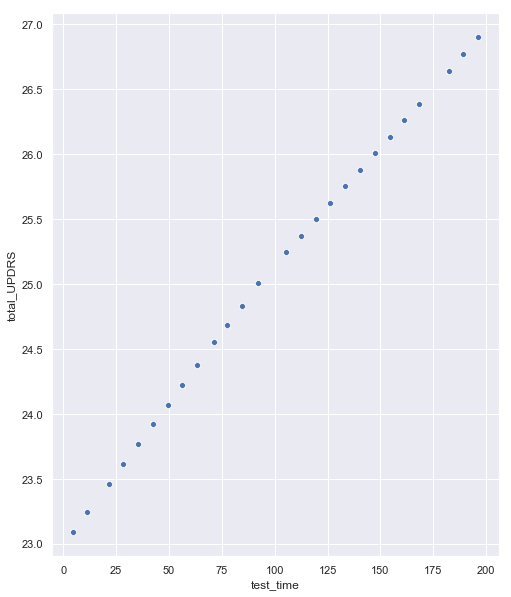

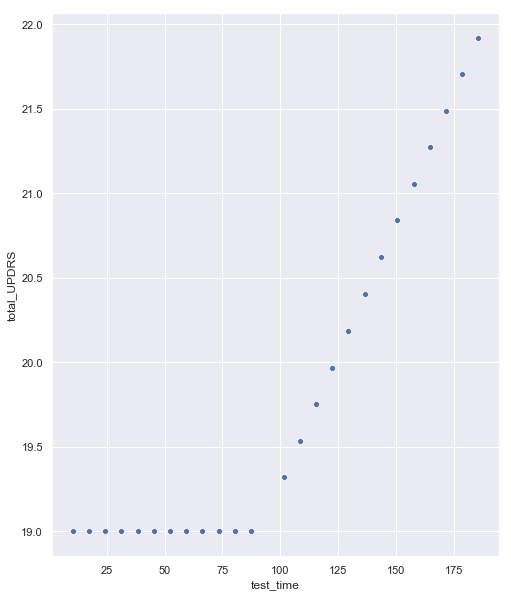

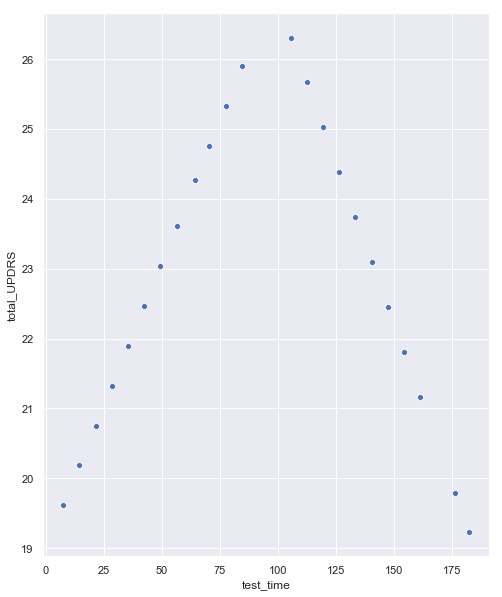

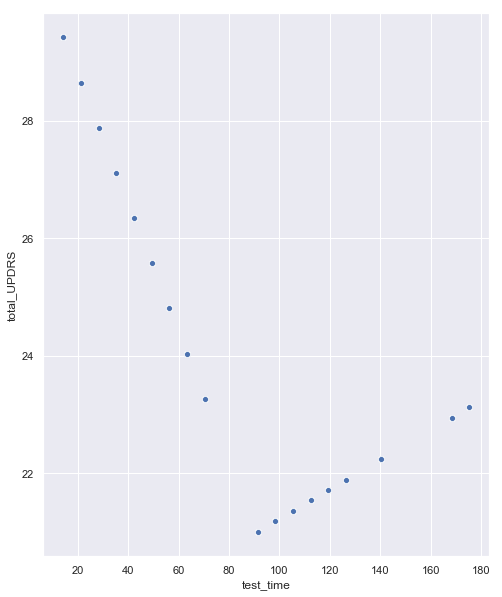

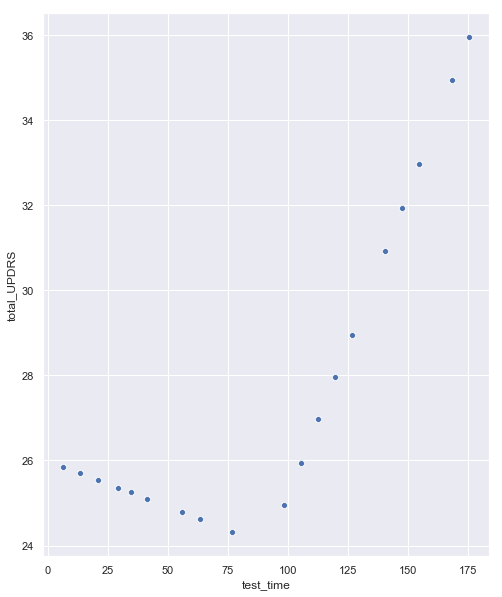

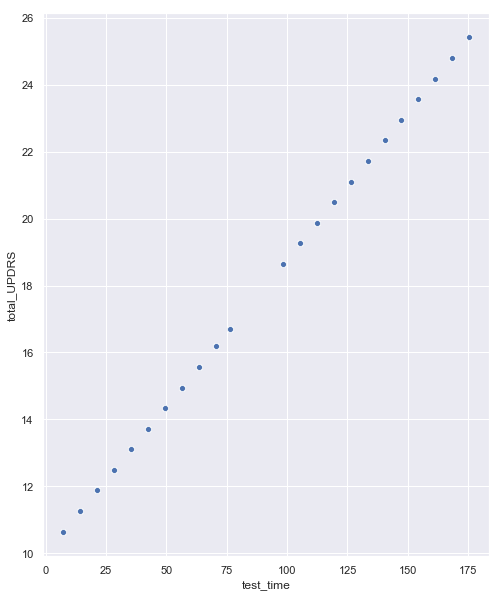

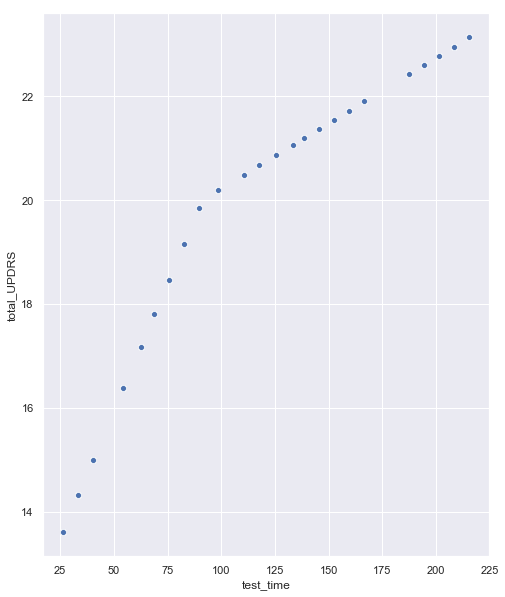

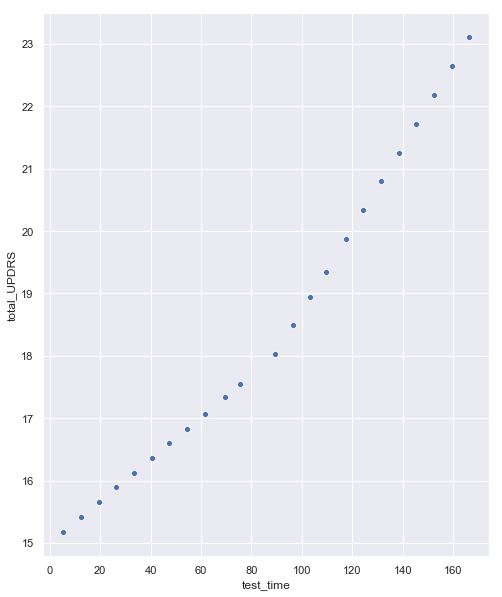

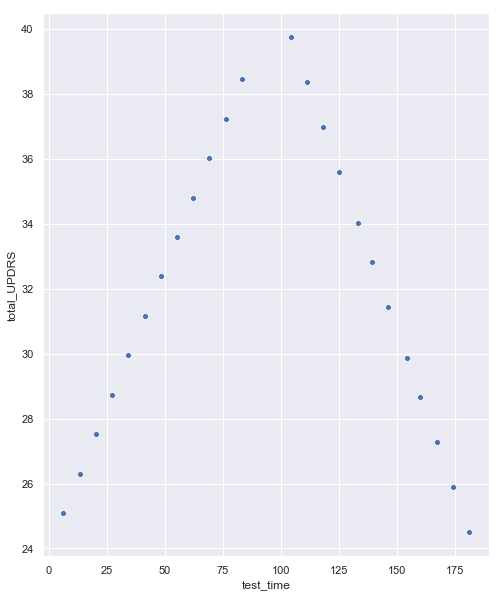

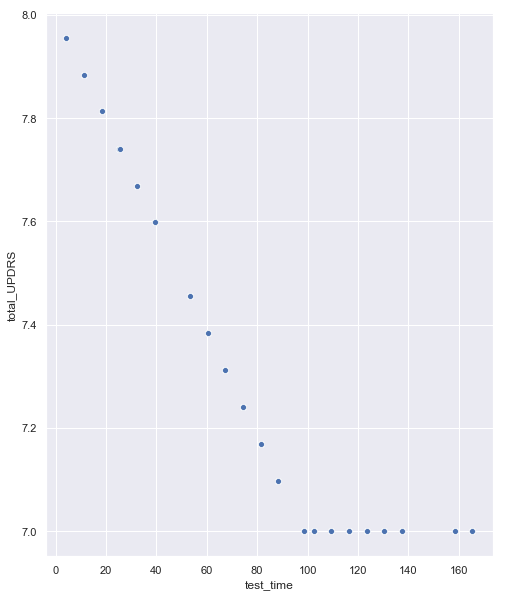

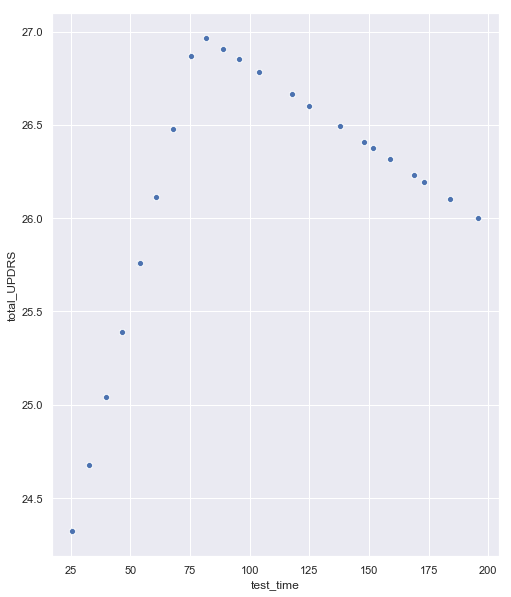

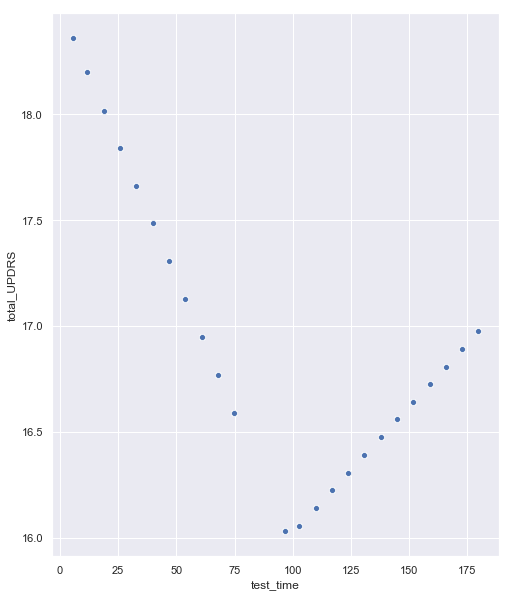

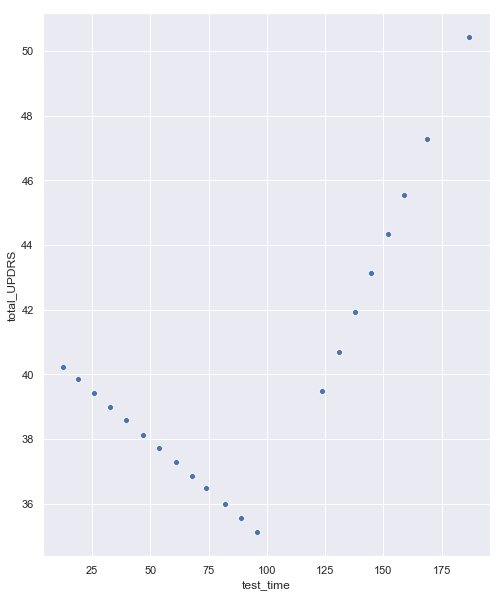

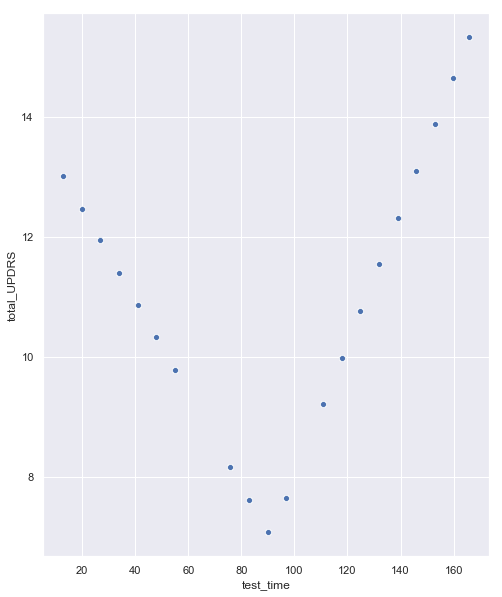

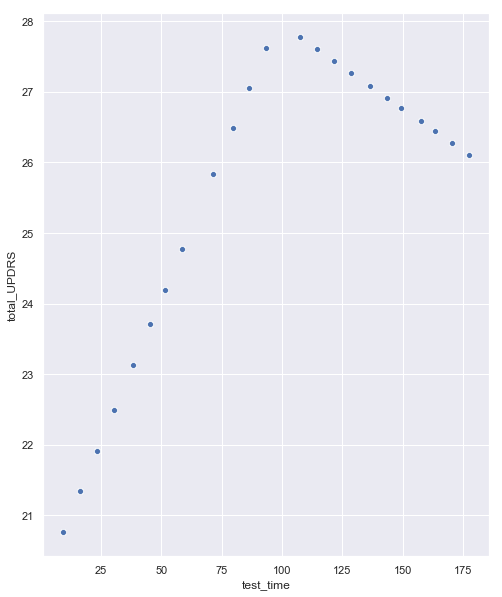

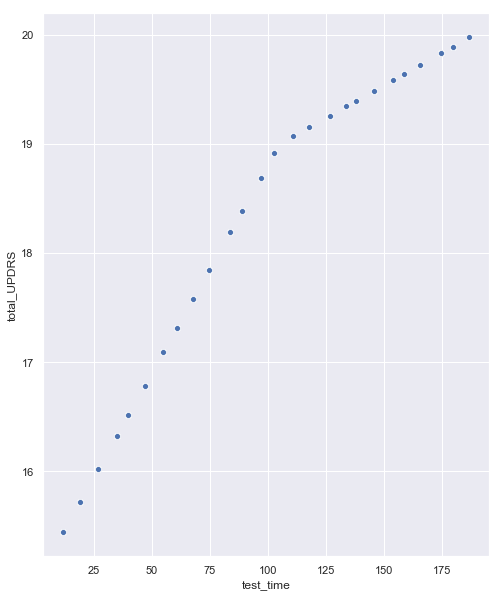

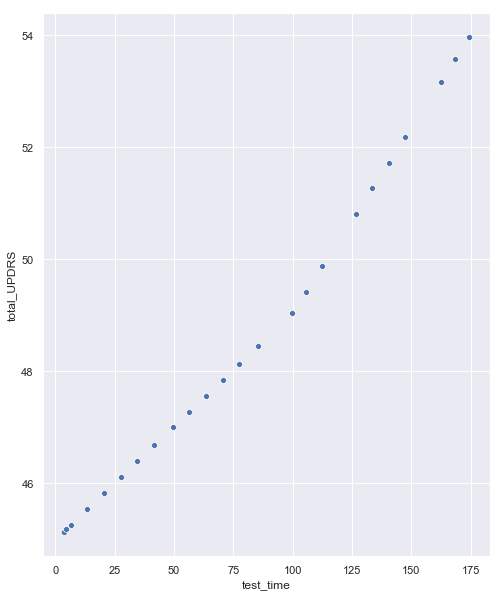

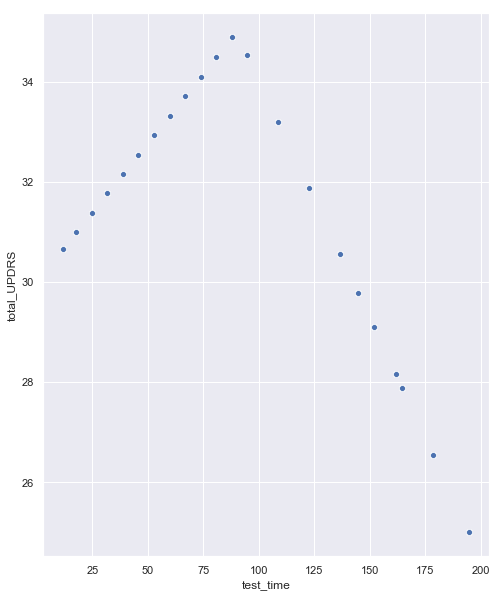

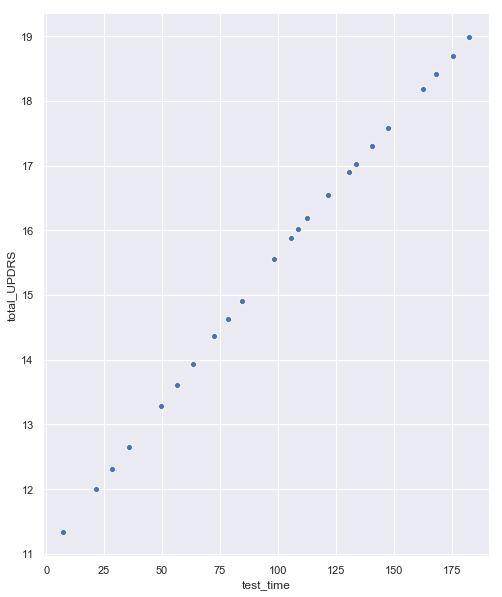

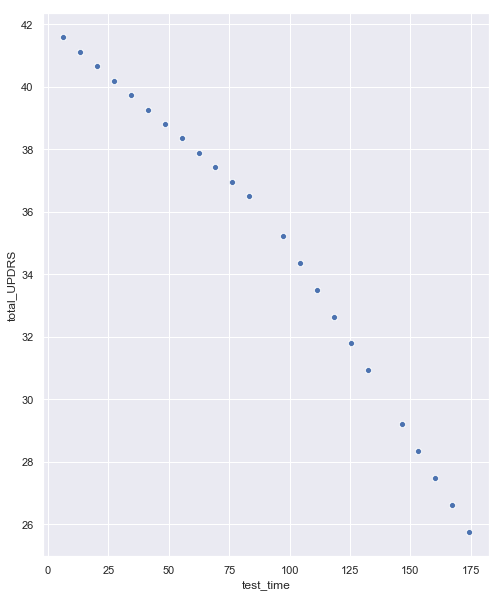

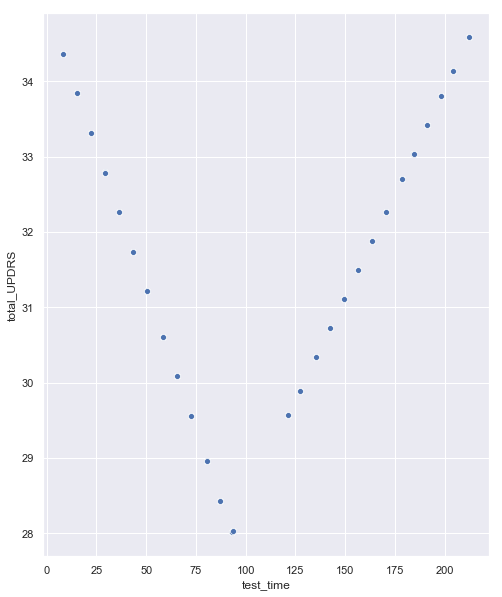

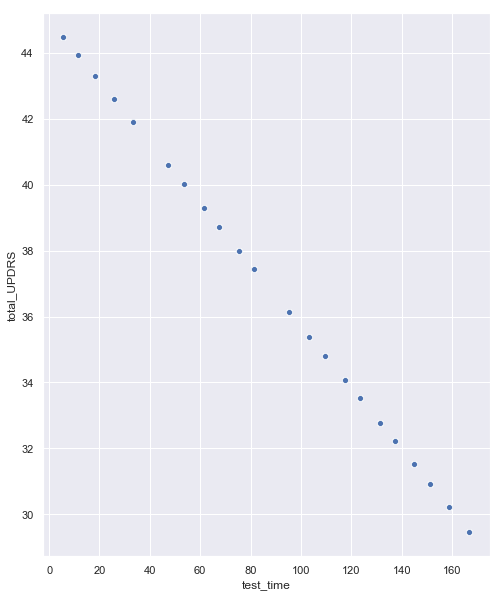

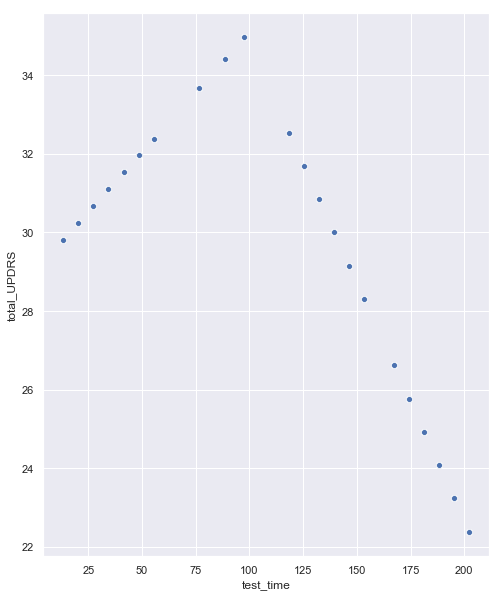

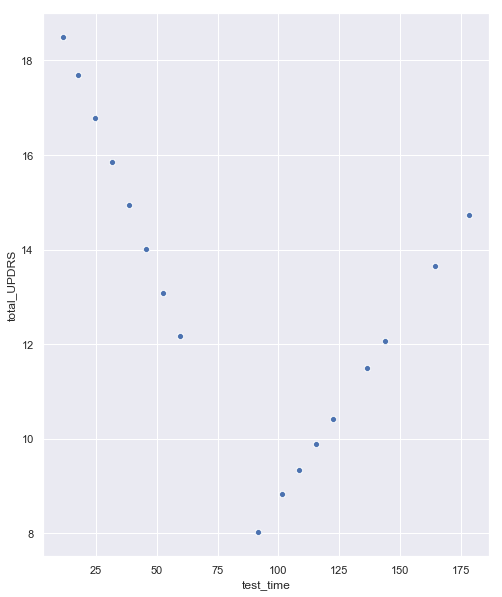

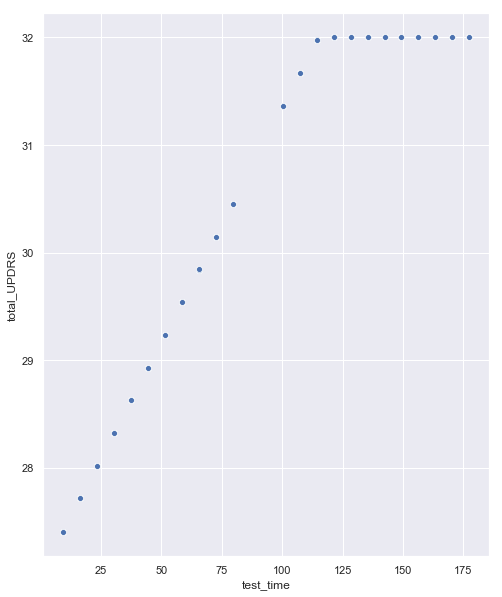

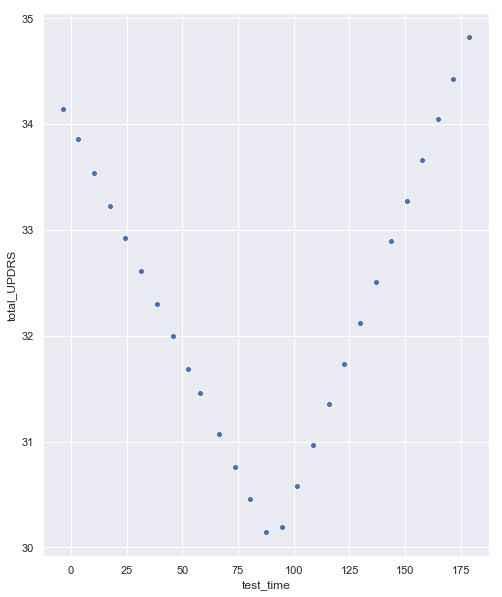

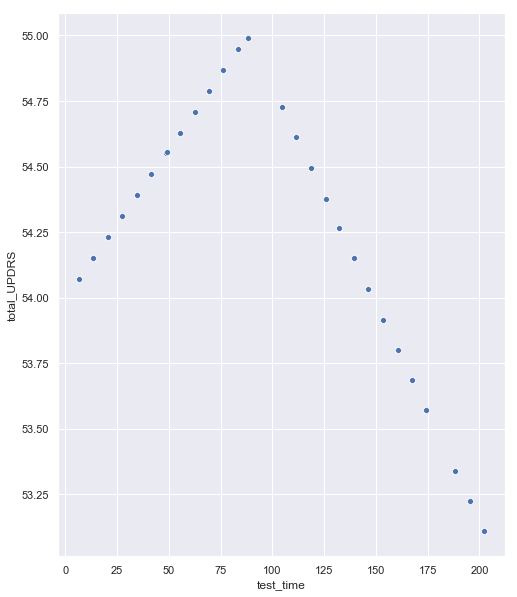

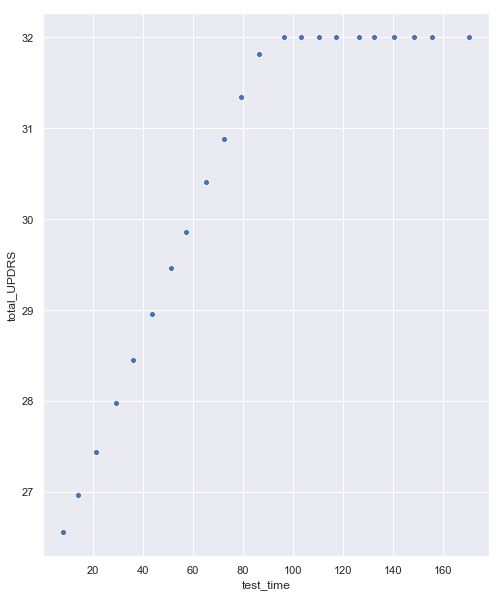

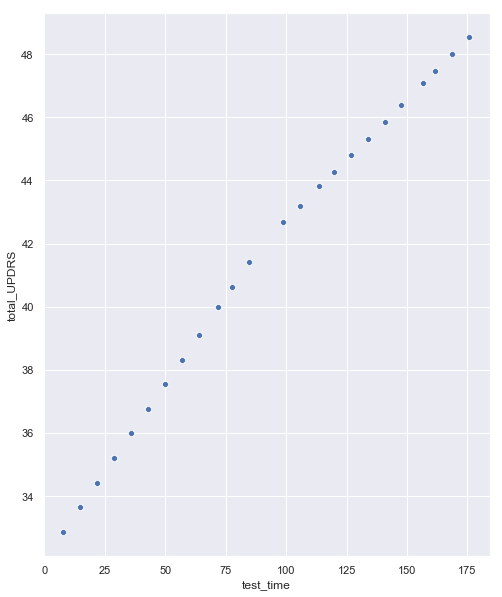

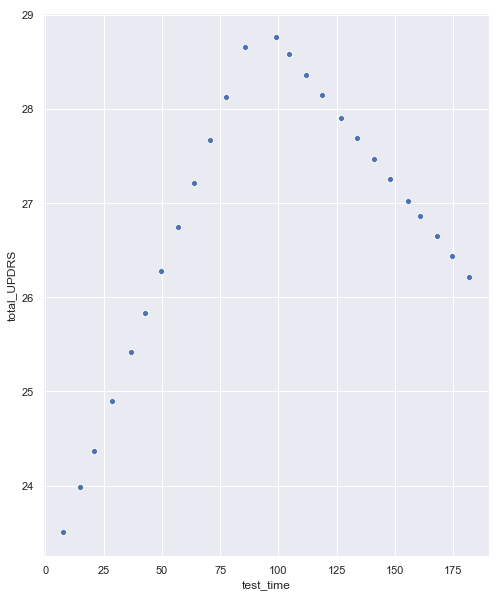

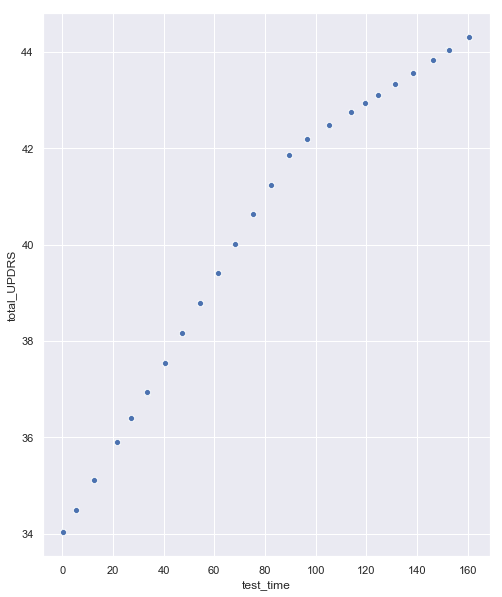

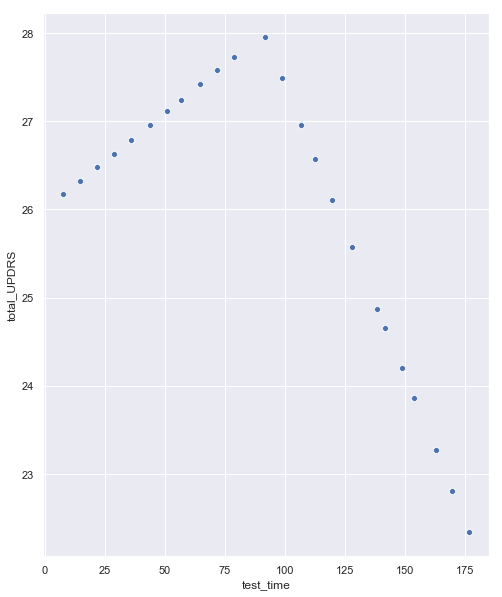

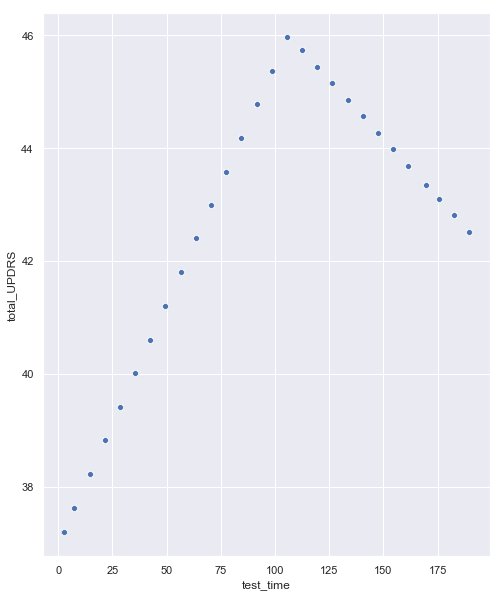

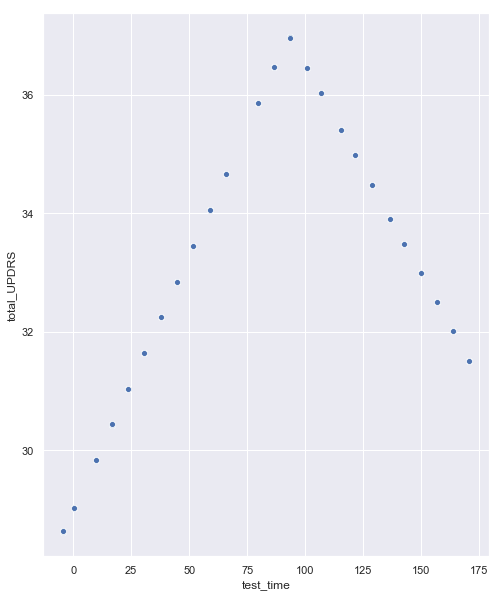

In [114]:
for i in range(42):    
    sns.scatterplot(x='test_time', y='total_UPDRS', data=df[df['subject#'] == i+1])
    plt.show()

Looking through these graphs it looks like there is very little noise between measurements and then these huge shifts in slope at a particular time. I'm not quite sure what to make of that but it always happens at around 90-100 days. Let's go to the paper...okay so if you read the methods in the paper, it turns out that the UPDRS scores are only calculated three times: once at time 0, once at 3 months, and once at 6 months. The lines we see are actually linear extrapolations between the 3 measurement points so that the scores change slowly over time as oppose to having large jumps. They offer an explanation for why this is a good idea, but regardless it's something to keep in mind for any model we try to derive from the data. Note to self: ask someone who knows more about Parkinson's and medical data.

Okay so if we're going to try to create a model which predicts total_UPDRS score from  various possible variables, I think it's a good first step to look and see if any of these variables correlate with UPDRS on their own or with each other. 

In [115]:
#df.groupby('sex').describe().T

In [116]:
#A variable of all the independent variables we may want to call so that I'm not typing a lot.
indcols = ['age', 'sex','Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

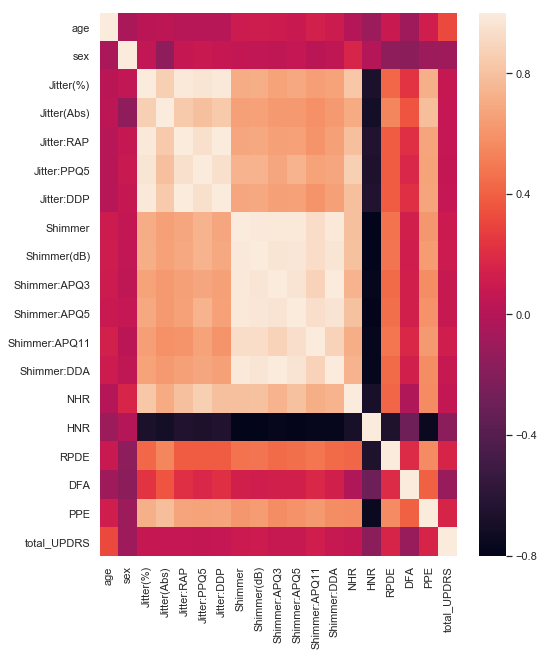

In [117]:
corr = df[indcols + ['total_UPDRS']].corr()
sns.heatmap(corr)

*Before I go any further, I have to acknowledge a huge caveat to this data. The data is NOT ~5875 independent measurements. The data only has 42 subjects, from which many measurements are taken. The fact that these measurements are taken over time from the same individual should be considered in creating models. I want to do more research into this, but right now I don't know how to do it, so I'm going to continue as if these are independent and we should just take that as a caveat for any results.*

If we look at this heat map, we can see a number of things. First of all, as we might intuit, the multiple types of "jitter", or measures in variation of fundamental frequency of speaking, as well as the multiple types of "shimmer", or measures in variation of amplitude of speaking, are very correlated with each other. Also, we can see that many of the measures of speech in general are correlated with each other. Because jitter and shimmer are so correlated, it might make sense to only use one of the measurements or perhaps reduce their dimensions with a principle component analysis.
We can also see from this heat map that age, sex, HNR, and DFA all seem to have more correlation (or anti-correlation) with total_UPDRS than the other measures. Let's get an exact measurement on how things correlate with UPDRS.

In [118]:
corr.total_UPDRS

age              0.310290
sex             -0.096559
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
Jitter:DDP       0.064027
Shimmer          0.092141
Shimmer(dB)      0.098790
Shimmer:APQ3     0.079363
Shimmer:APQ5     0.083467
Shimmer:APQ11    0.120838
Shimmer:DDA      0.079363
NHR              0.060952
HNR             -0.162117
RPDE             0.156897
DFA             -0.113475
PPE              0.156195
total_UPDRS      1.000000
Name: total_UPDRS, dtype: float64

Perhaps not surprisingly, age is the strongest correlate with total_UPDRS. After age, Shimmer APQ11, HNR, DFA, and PPE seem to be the strongest correlates. See paper for details on what those measurements are.

I'm going to try a linear regression model for predicting total_UPDRS using all of the metrics recorded as well as reducing the number of metrics to only the ones that are most correlated with UPDRS.

[ 3.05653631e-01 -2.78084701e+00  7.24921909e+01 -6.32678507e+04
 -4.33085224e+04 -3.12624428e+02  1.46847927e+04  1.39860365e+02
 -8.29378735e+00 -1.87382481e+04 -7.34273159e+01  5.26894682e+01
  6.17963898e+03 -1.43298302e+01 -6.14509283e-01  3.70574808e+00
 -3.09868312e+01  1.79585710e+01]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
40.57384992197205


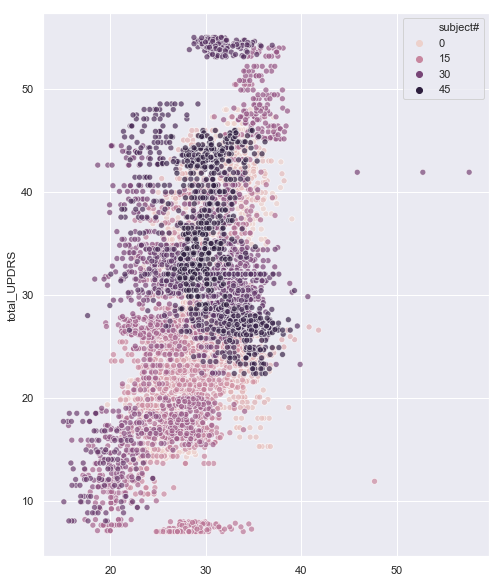

In [128]:
reg = lm.LinearRegression()
reg.fit(df[indcols], df.total_UPDRS)
#print(reg.coef_)
#print(reg.get_params())
#print(reg.intercept_)
predictions = reg.predict(df[indcols])
sns.scatterplot(x=predictions, y=df.total_UPDRS, hue=df['subject#'], alpha=0.7)

This looks okay, but not great. I should measure how good each model is and I think I'm going to compare it to the simplest possible model: the average. 

In [129]:
UPDRSmean = np.mean(df.total_UPDRS)
#print(UPDRSmean)
goodnessfit = np.mean((UPDRSmean - df.total_UPDRS) ** 2) #mean squared error mse, the thing both forests and lienar regression are trying to minimize. prediction for each point is the average of each. try to beat that. that's first pass, linear model is second pass.
print("average model goodness of fit: ", goodnessfit)

goodnessfit = np.mean((predictions - df.total_UPDRS) ** 2) 
print("linear regression with all indpenedent variable model of goodniess of fit: ", goodnessfit)


average model goodness of fit:  114.47657298806425
linear regression with all indpenedent variable model of goodniess of fit:  95.04074181802919


What if we only use the high-correlation columns?

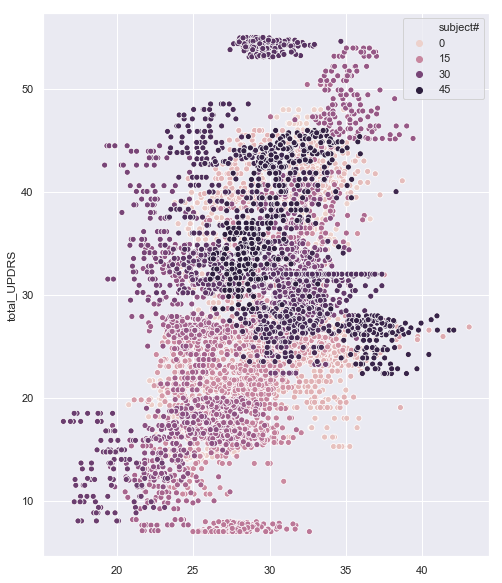

In [131]:
highcorcols = ['age', 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE']
reg.fit(df[highcorcols], df.total_UPDRS)
#print(reg.coef_)
#print(reg.get_params())
#print(reg.intercept_)
predictions = reg.predict(df[highcorcols])
sns.scatterplot(x=predictions, y=df.total_UPDRS, hue=df['subject#'])

This model looks better than the last one. How does it perform on MSE?

In [132]:
goodnessfit = np.mean((predictions - df.total_UPDRS) ** 2) 
print(goodnessfit)


98.4168551413784


*error* ^this goodness of fit is the same...can't figure out what's wrong with the code to have the SAME goodnness of fit.

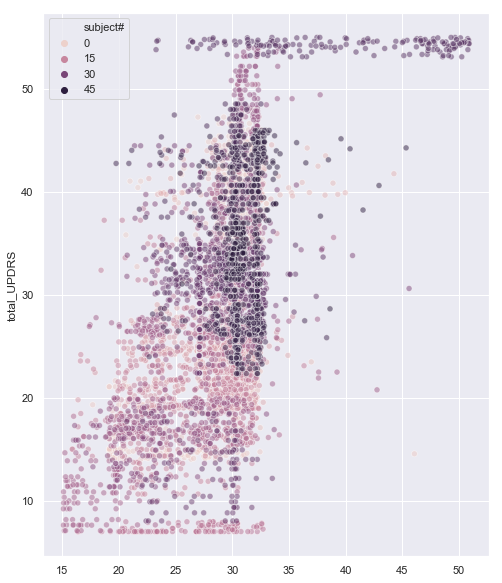

In [133]:
rfr = ensemble.RandomForestRegressor(n_estimators=1000, max_leaf_nodes=20, n_jobs=-1)
rfr.fit(df[predictcols], df.total_UPDRS)
predictions = rfr.predict(df[predictcols])
sns.scatterplot(x=predictions, y=df.total_UPDRS, hue=df['subject#'], alpha=0.5)

In [134]:
goodnessfit = np.mean((predictions - df.total_UPDRS) ** 2) 
print(goodnessfit)

81.89458379610971


Now again with only the better-correlating variables

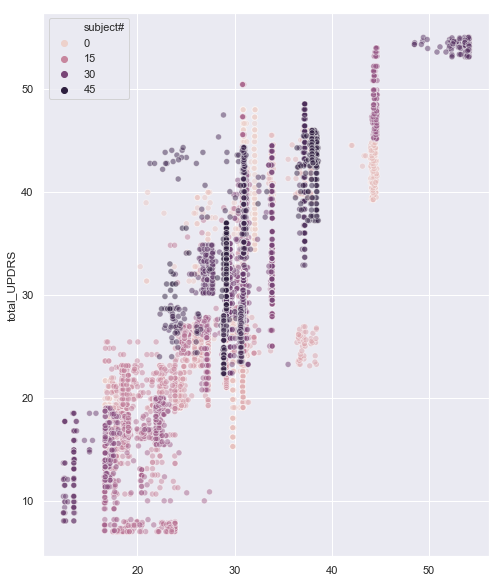

In [135]:
rfr = ensemble.RandomForestRegressor(n_estimators=1000, max_leaf_nodes=20, n_jobs=-1)
rfr.fit(df[highcorcols], df.total_UPDRS)
predictions = rfr.predict(df[highcorcols])
sns.scatterplot(x=predictions, y=df.total_UPDRS, hue=df['subject#'], alpha=0.5)

In [136]:
goodnessfit = np.mean((predictions - df.total_UPDRS) ** 2) 
print(goodnessfit)

32.52725873366948


This is looking a bit better as a group, but if you look at the colors of the dots, which correspond to subject#, you can see that within subjects the algorithm doesn't seem to be predicting super well. Rather, it's organizing the subjects more or less correctly based on their average severity. Perhaps this is due to an overreliance of age, which does change between subjects but not within them. Let's plot each subject individually just to get a better grasp on if that's usually the case.

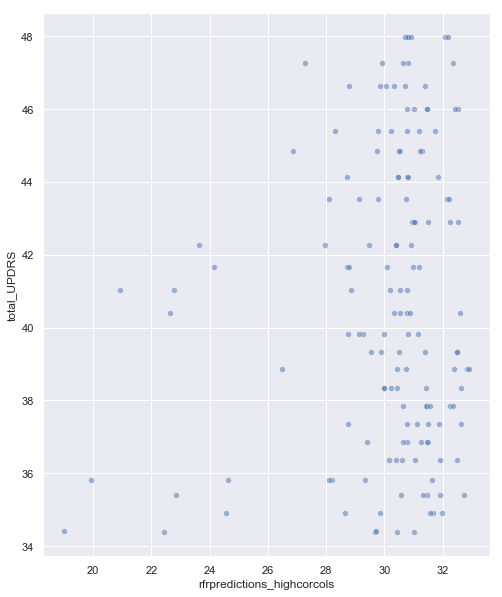

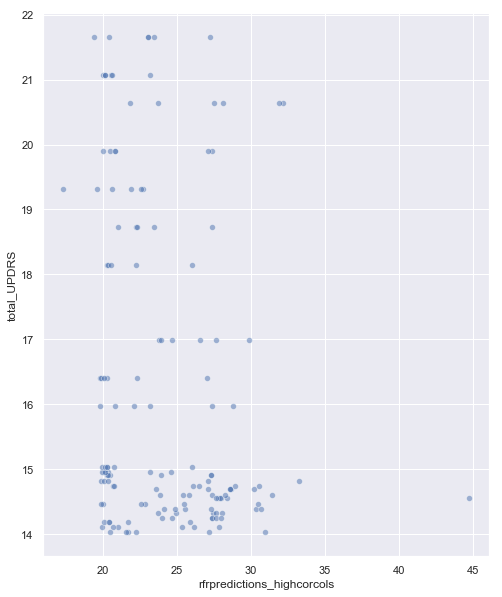

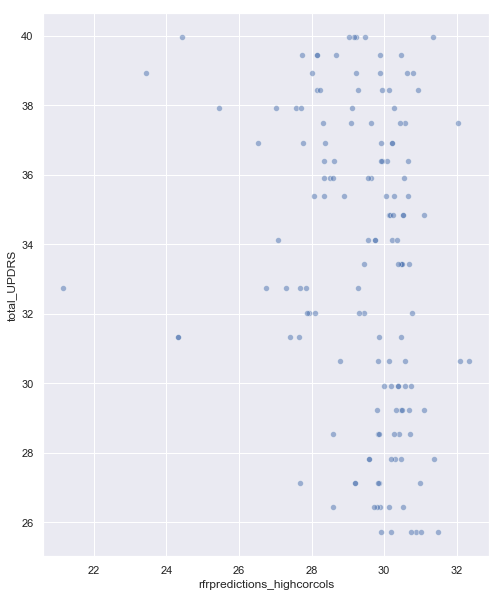

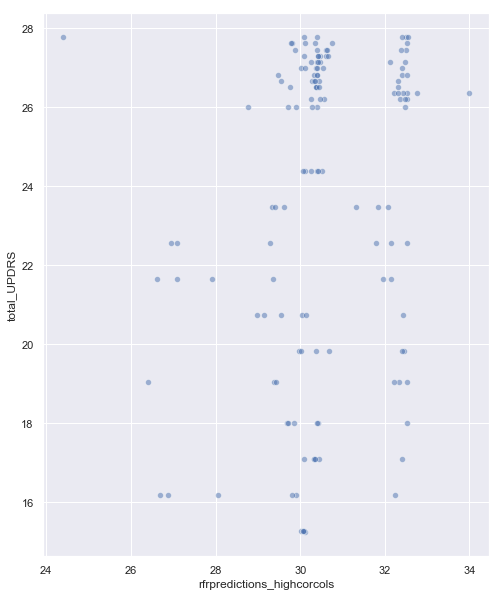

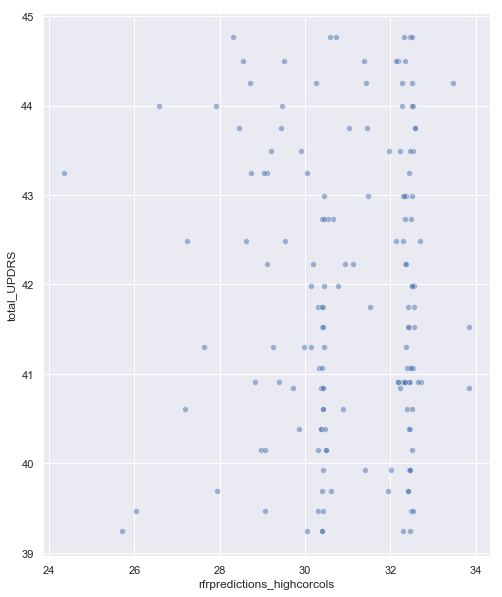

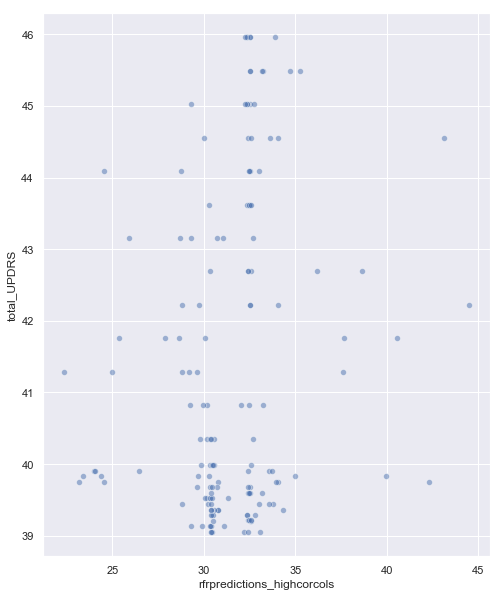

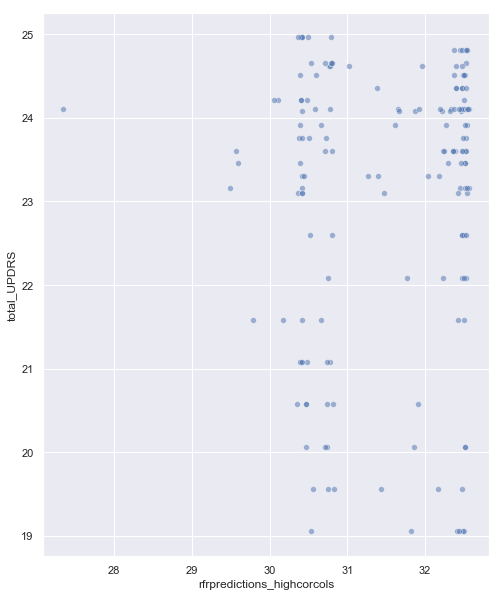

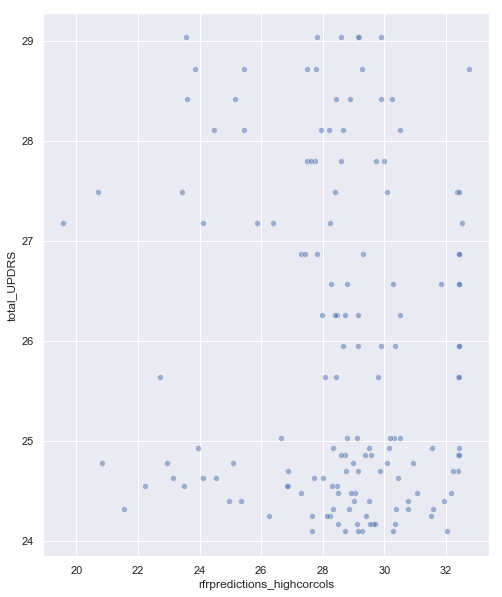

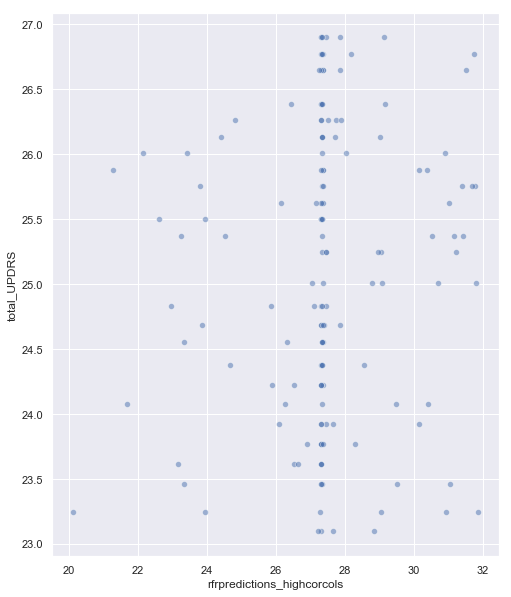

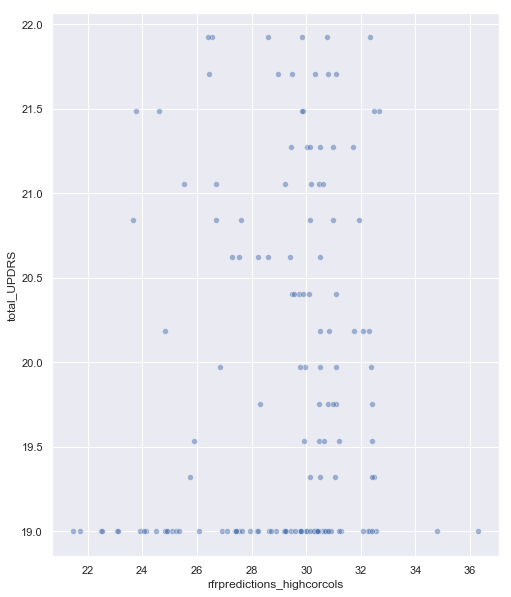

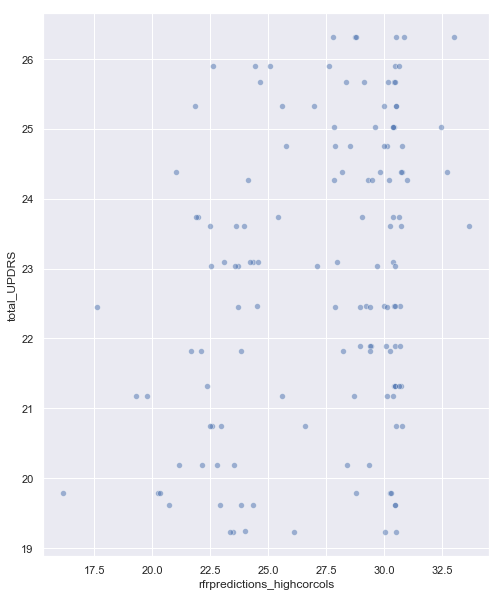

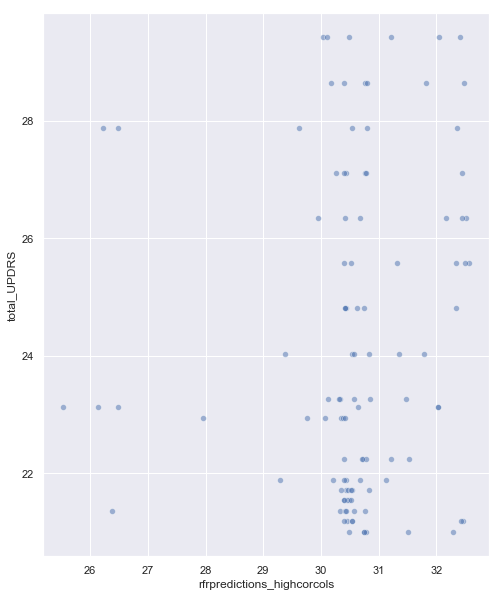

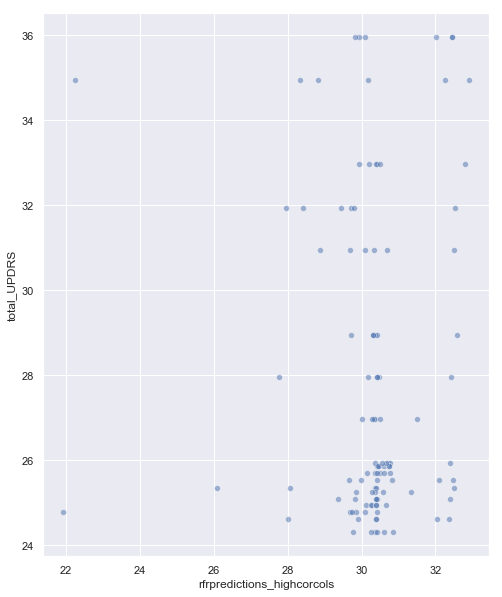

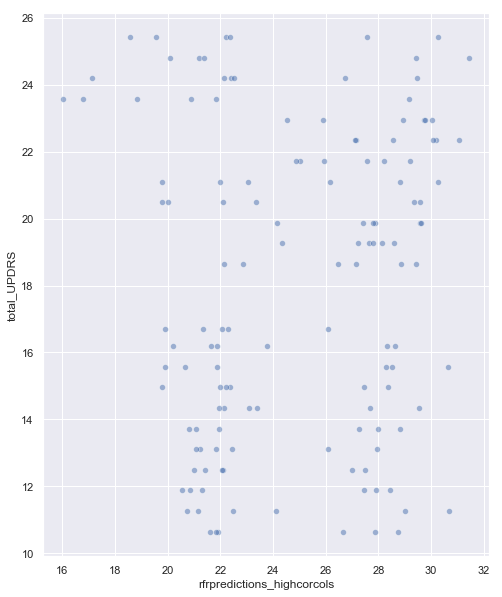

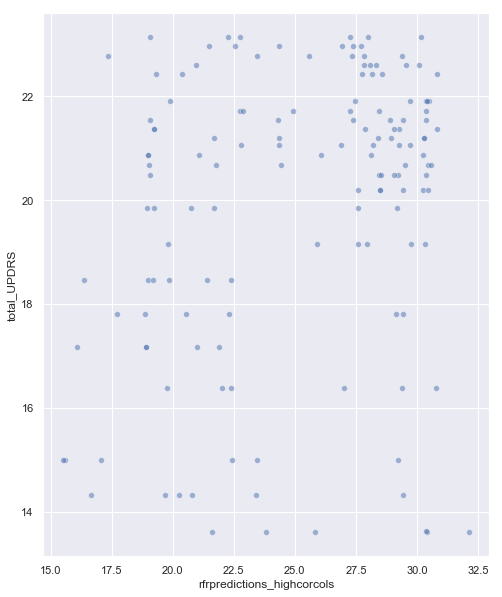

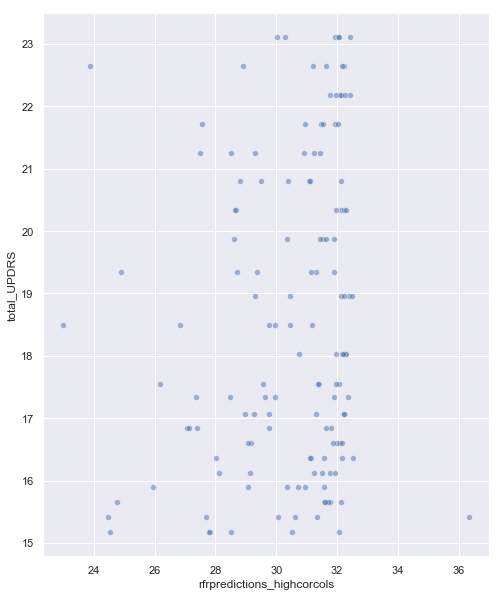

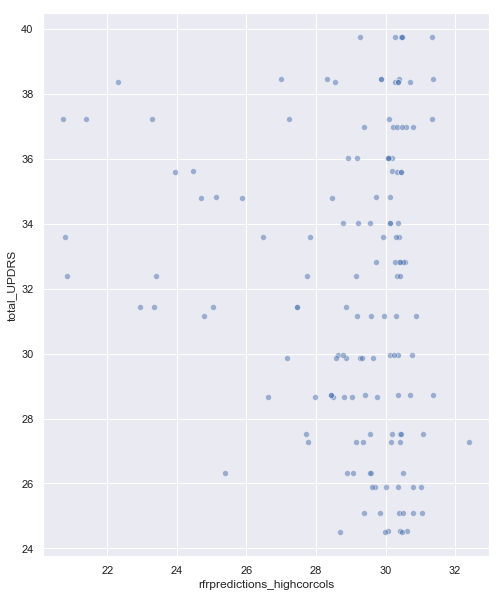

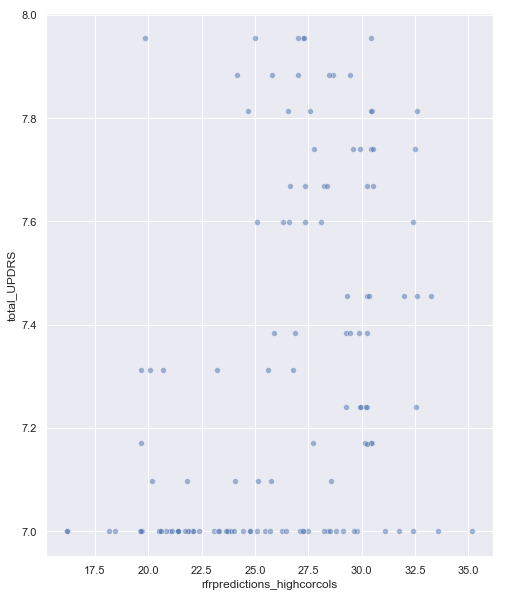

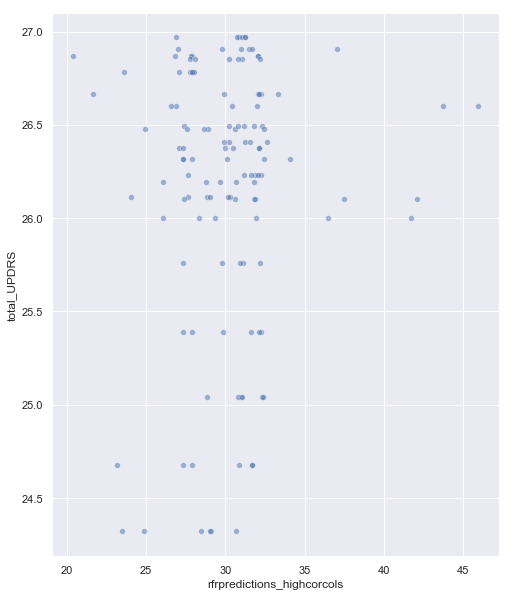

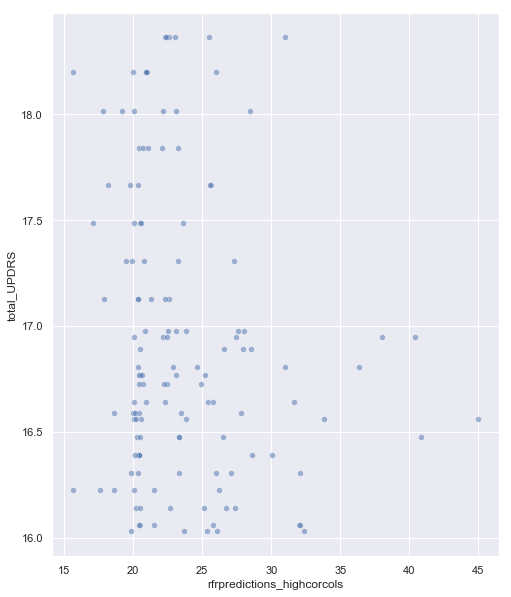

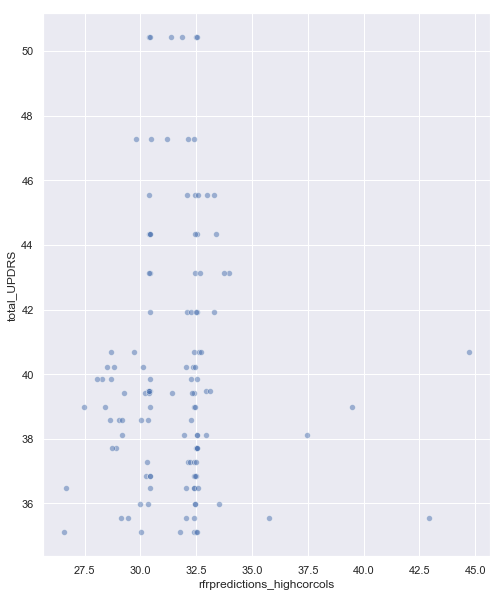

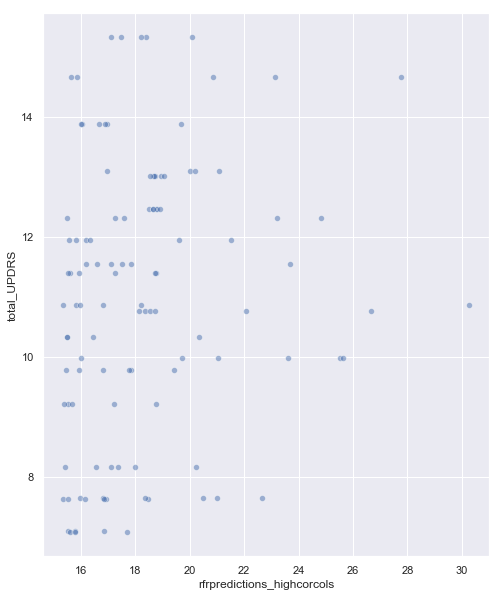

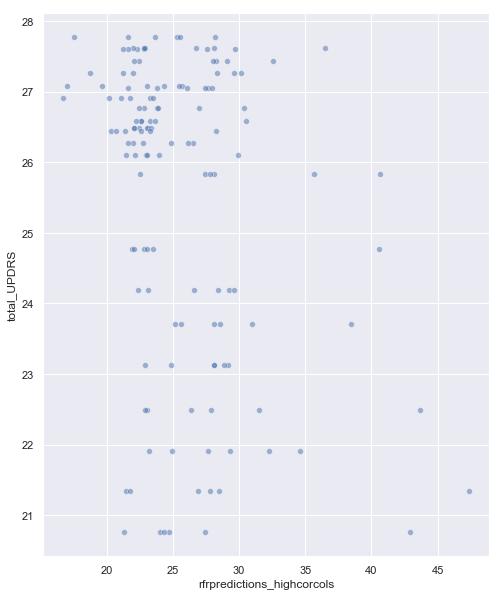

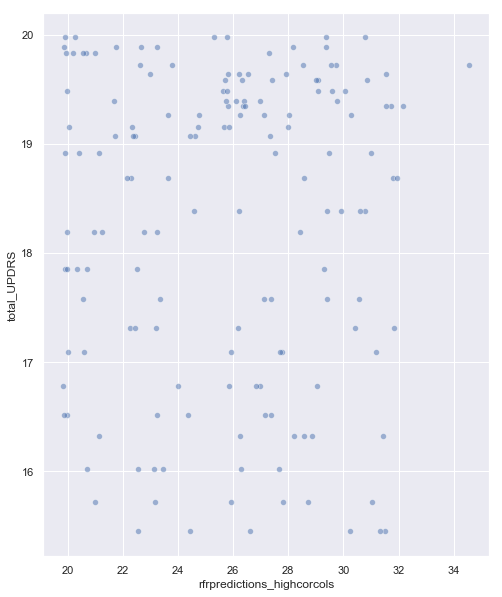

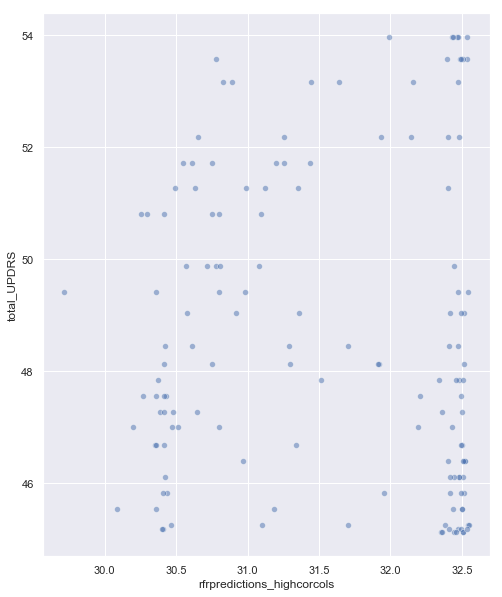

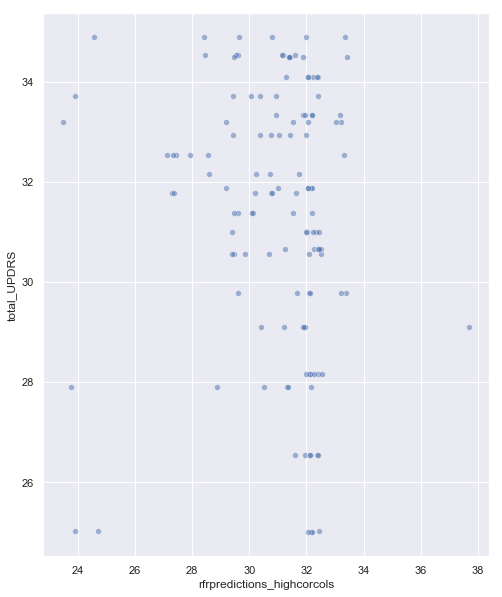

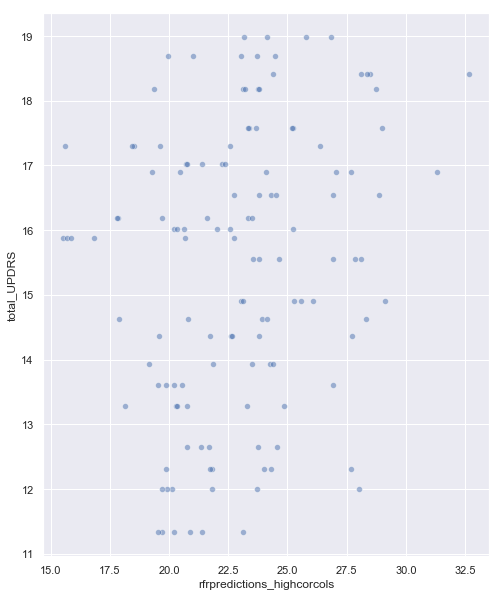

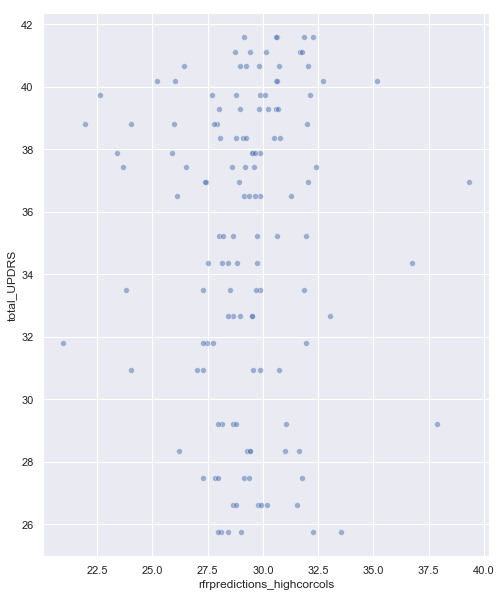

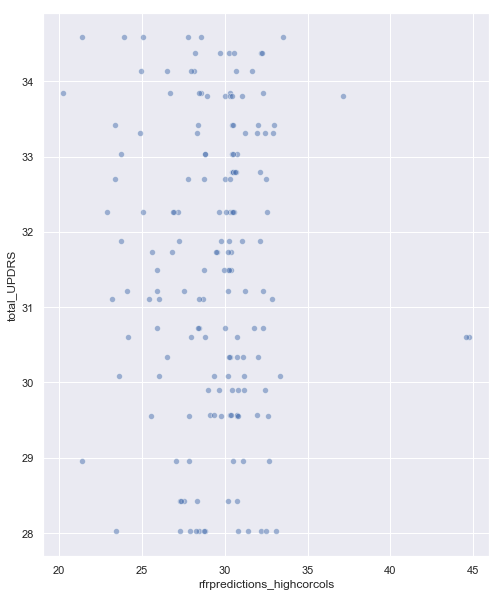

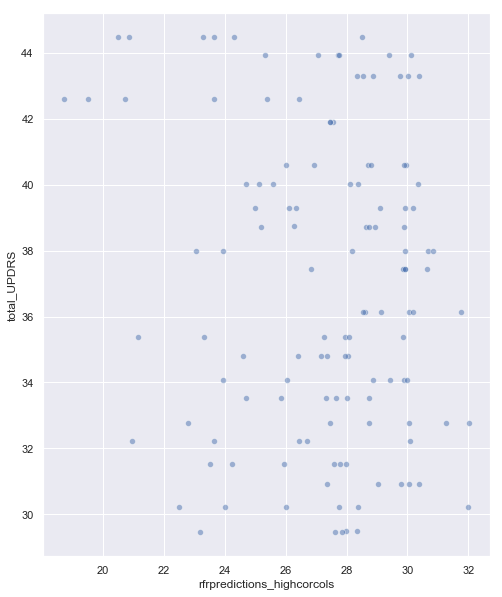

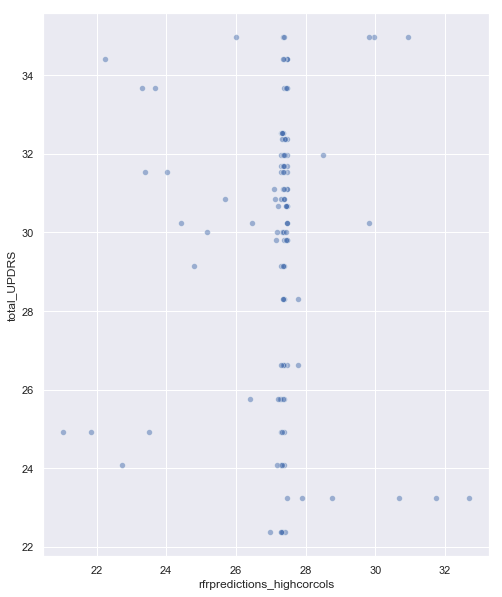

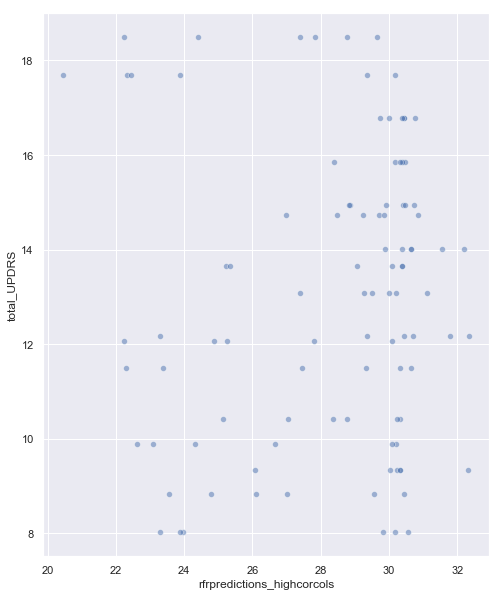

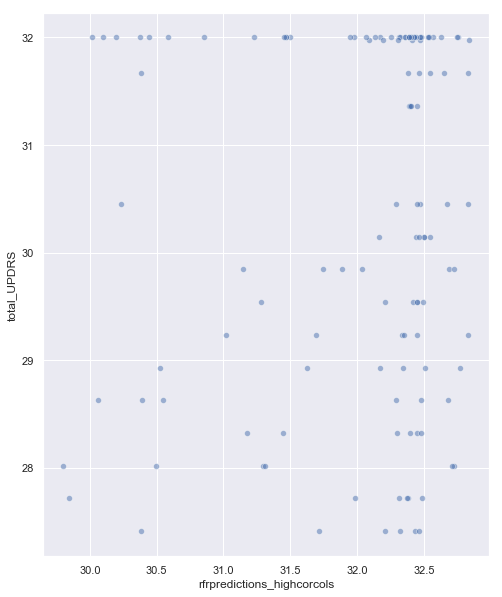

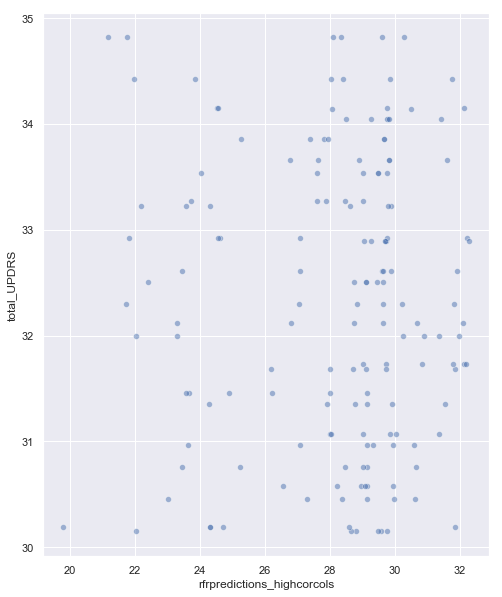

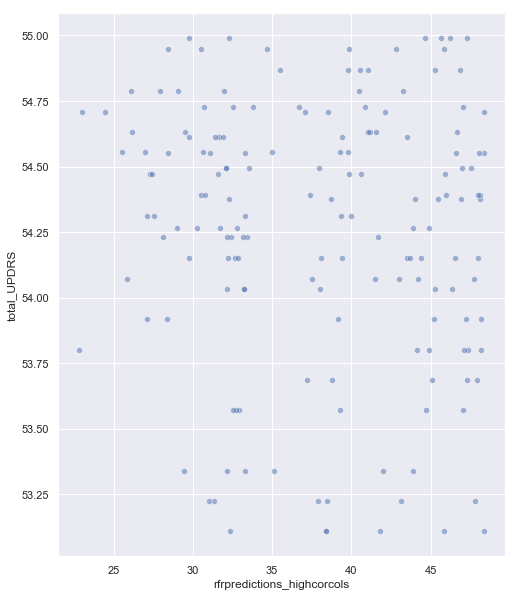

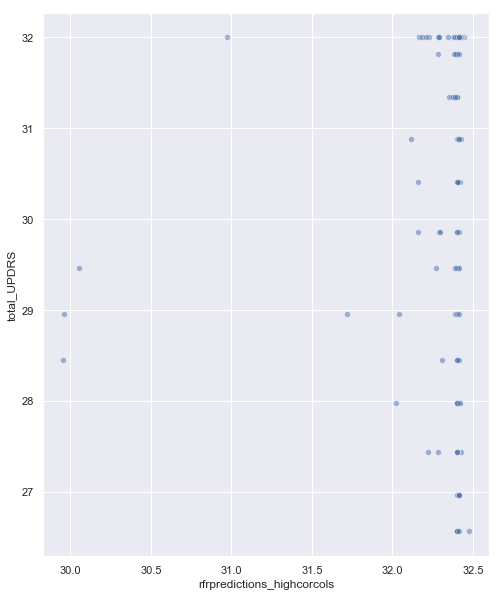

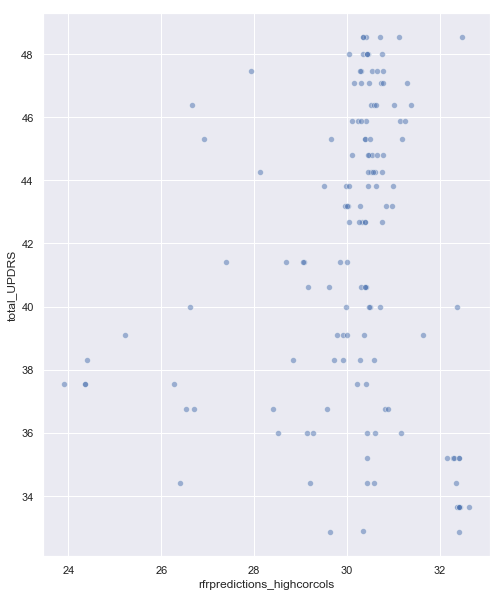

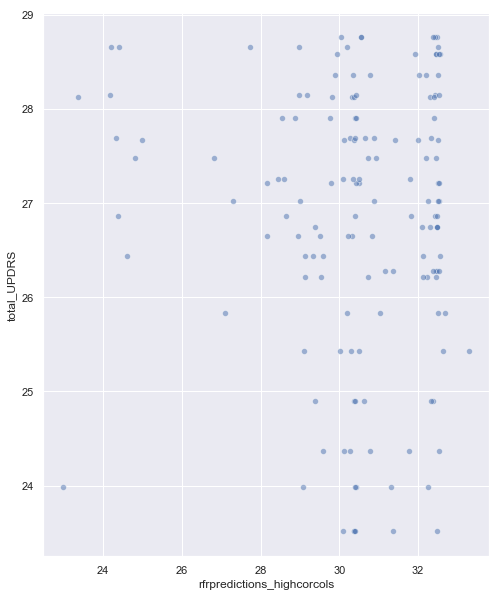

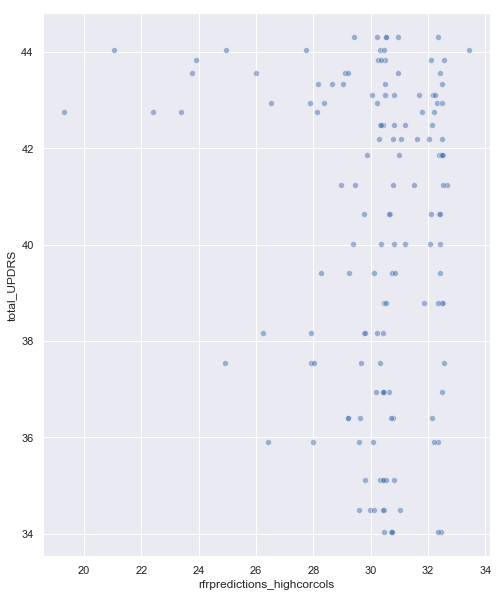

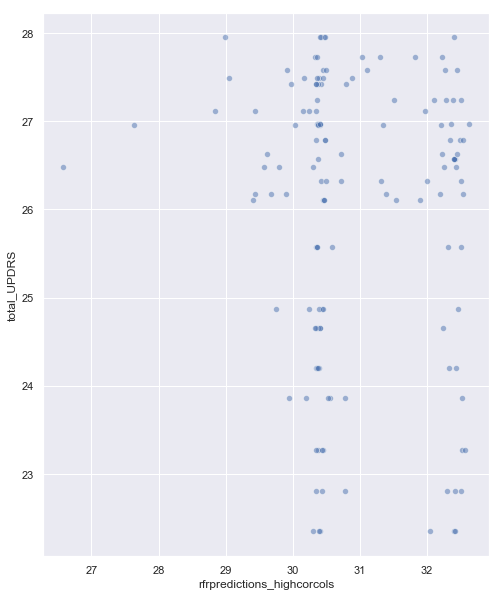

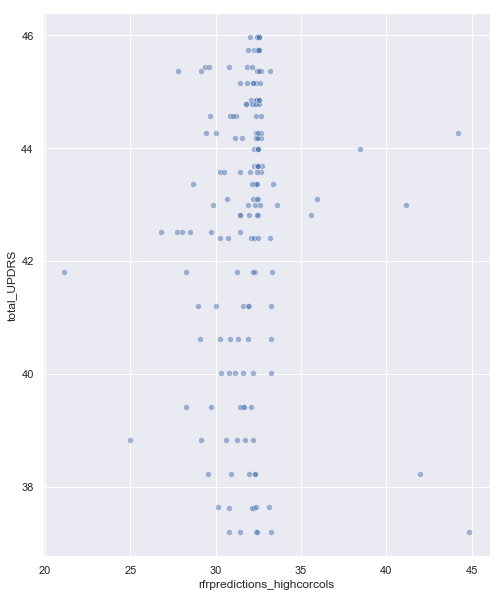

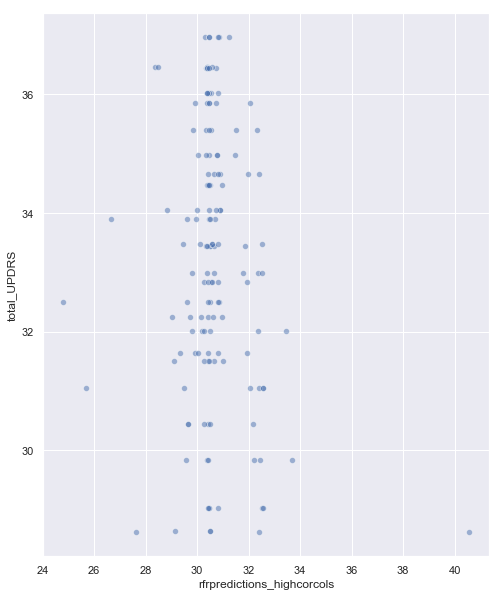

In [146]:
df['rfrpredictions_highcorcols'] = predictions  
#for i in range(42):    
 #   sns.scatterplot(x='test_time', y='total_UPDRS', data=df[df['subject#'] == i+1])
  #  plt.show()
for i in range(42):
    sns.scatterplot(x='rfrpredictions_highcorcols', y='total_UPDRS', data=df[df['subject#'] == i+1], alpha=0.5)
    plt.show()                                                                             

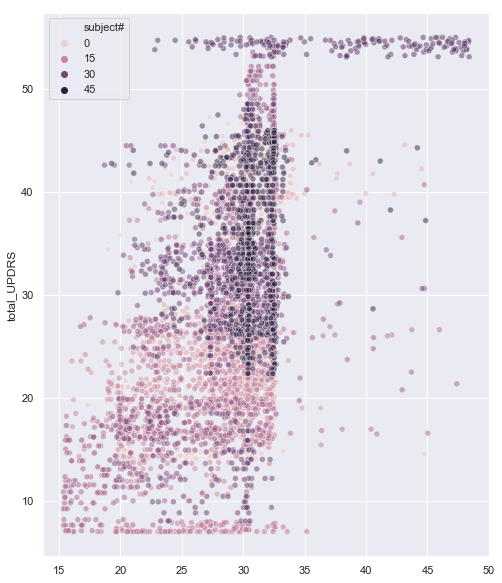

In [137]:
highcorcols.remove('age')
rfr.fit(df[highcorcols], df.total_UPDRS)
predictions = rfr.predict(df[highcorcols])
sns.scatterplot(x=predictions, y=df.total_UPDRS, hue=df['subject#'], alpha=0.5)

In [138]:
goodnessfit = np.mean((predictions - df.total_UPDRS) ** 2) 
print(goodnessfit)

85.54213856381894


Here we see that removing age removes a lot of the signal in our model, and frankly predicting severity from age is a) not a great predictor, and b) not the purpose of making voice recordings in order to predict severity. How can we increase the strength of the model using only voice metrics?

Idea: utilize statistics that take into account whether they're measuring variation within patients or between patients.
Idea: PCA over all jitters or all shimmers and take first couple PCs in lieu of each one. Perhaps a joint, less noisy, measure of jitter and shimmer will provide more clarity.

To be continued....

In [39]:
pca_shimmer = decomposition.PCA(n_components=2)
pca_jitter = decomposition.PCA(n_components=2)
shimmer_cols = [col for col in predictcols if 'Shimmer' in col]
jitter_cols = [col for col in predictcols if 'Jitter' in col]
shimmer_pcs = pca_shimmer.fit_transform(df[shimmer_cols]) #use these two instead of any of the shimmers in the models to see if it improves
pca_jitter.fit_transform(df[jitter_cols])


array([[ 2.87719038e-03,  1.52480255e-03],
       [-6.39944214e-03, -5.37880622e-05],
       [-3.44345560e-03, -3.15569179e-05],
       ...,
       [-5.52495249e-03, -2.07756979e-04],
       [-6.59056680e-03, -5.25431706e-05],
       [-6.34117323e-03, -5.32631880e-05]])

In [40]:
pca_shimmer.

SyntaxError: invalid syntax (<ipython-input-40-1185e04ede35>, line 1)

In [41]:
df['Shimmer_PC0'] = shimmer_pcs[:,0]